In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import ast
import re

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, auc

import xgboost as xgb

In [2]:
df = pd.read_csv('../data/processed/final_model_data.csv')
df.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,highest_education_level,degree_type,resume_text,Resume_Cluster_KMeans,resume_text_for_sim,job_text_for_sim,Cosine_Similarity,resume_text_for_embedding,job_text_for_embedding,Embedding_Cosine_Similarity
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,Bachelors,STEM,"skills ['Big Data', 'Hadoop', 'Hive', 'Python'...",2,Big data analytics working and database wareho...,Senior Software Engineer B.Sc in Computer Scie...,0.006683,Big data analytics working and database wareho...,Senior Software Engineer B.Sc in Computer Scie...,0.419060
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,Masters,STEM,"skills ['Data Analysis', 'Data Analytics', 'Bu...",2,Fresher looking to join as a data analyst and ...,Machine Learning (ML) Engineer M.Sc in Compute...,0.094794,Fresher looking to join as a data analyst and ...,Machine Learning (ML) Engineer M.Sc in Compute...,0.494434
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,Bachelors,STEM,"skills ['Software Development', 'Machine Learn...",0,"['Software Development', 'Machine Learning', ...","Executive/ Senior Executive- Trade Marketing, ...",0.000000,"['Software Development', 'Machine Learning', ...","Executive/ Senior Executive- Trade Marketing, ...",0.354318
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,Other,STEM,"skills ['accounts payables', 'accounts receiva...",4,To obtain a position in a fast-paced business ...,Business Development Executive Bachelor/Honors...,0.022270,To obtain a position in a fast-paced business ...,Business Development Executive Bachelor/Honors...,0.451188
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,Bachelors,Business,"skills ['Analytical reasoning', 'Compliance te...",4,Professional accountant with an outstanding wo...,Senior iOS Engineer Bachelor of Science (BSc) ...,0.008438,Professional accountant with an outstanding wo...,Senior iOS Engineer Bachelor of Science (BSc) ...,0.260111


Seperating data into features and Target:

In [3]:
df.columns

Index(['address', 'career_objective', 'skills', 'educational_institution_name',
       'degree_names', 'passing_years', 'educational_results', 'result_types',
       'major_field_of_studies', 'professional_company_names', 'company_urls',
       'start_dates', 'end_dates', 'related_skils_in_job', 'positions',
       'locations', 'responsibilities', 'extra_curricular_activity_types',
       'extra_curricular_organization_names',
       'extra_curricular_organization_links', 'role_positions', 'languages',
       'proficiency_levels', 'certification_providers', 'certification_skills',
       'online_links', 'issue_dates', 'expiry_dates', 'job_position_name',
       'educationaL_requirements', 'experiencere_requirement',
       'age_requirement', 'responsibilities.1', 'skills_required',
       'matched_score', 'experience_years_required', 'Skill_Overlap_Count',
       'Skill_Jaccard_Score', 'Resume_Years_Exp', 'Experience_Mismatch',
       'highest_education_level', 'degree_type', 'resume_t

In [4]:
numerical_features = [
    'experience_years_required', 
    'Skill_Overlap_Count', 
    'Skill_Jaccard_Score', 
    'Resume_Years_Exp', 
    'Experience_Mismatch',
    'Embedding_Cosine_Similarity'
]
categorical_features = ['Resume_Cluster_KMeans', 'highest_education_level', 'degree_type']
features = numerical_features + categorical_features

In [5]:
y = df['matched_score']
X = df[features].copy()

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ], 
    remainder='drop'
)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression:

In [8]:
lr_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor), 
        ('regressor', LinearRegression())
    ]
)

lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression RMSE: {rmse_lr:.4f}")
print(f"Linear Regression MAE: {mae_lr:.4f}")
print(f"Linear Regression R-squared: {r2_lr:.4f}")


Linear Regression RMSE: 0.1535
Linear Regression MAE: 0.1211
Linear Regression R-squared: 0.1479


## Random Forest:

In [9]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.4f}")
print(f"Random Forest MAE: {mae_rf:.4f}")
print(f"Random Forest R-squared: {r2_rf:.4f}")


Random Forest RMSE: 0.1497
Random Forest MAE: 0.1146
Random Forest R-squared: 0.1898


In [10]:
ohe_categories = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].categories_[0]
# Create the final feature names list (numerical + one-hot encoded categorical)
final_feature_names = numerical_features + [f'Cluster_{cat}' for cat in ohe_categories]
    
importances = rf_pipeline.named_steps['regressor'].feature_importances_
    
# Create a pandas series for easy plotting
feature_importance_series = pd.Series(importances, index=final_feature_names).sort_values(ascending=False)
    
# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_series, y=feature_importance_series.index)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

ValueError: Length of values (19) does not match length of index (11)

## XGBoost:

In [11]:
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1))])
xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost Regressor RMSE: {rmse_xgb:.4f}")
print(f"XGBoost Regressor MAE: {mae_xgb:.4f}")
print(f"XGBoost Regressor R-squared: {r2_xgb:.4f}")


XGBoost Regressor RMSE: 0.1431
XGBoost Regressor MAE: 0.1100
XGBoost Regressor R-squared: 0.2590


## Creating new features, and using them in our prediction to improve model performance.

In [12]:
def extract_gpa(text_list):
    """
    Parses a string-formatted list to find the first valid GPA or percentage.
    This version iterates through the list to find the first valid number.
    """
    try:
        # Safely parse the string into a list
        items = ast.literal_eval(str(text_list))
        # Loop through each educational record in the list
        for item in items:
            if item is None:
                continue
            # Find numbers, which could be GPA or percentage
            numbers = re.findall(r"(\d+\.?\d*)", str(item))
            if numbers:
                val = float(numbers[0])
                # Normalize percentages to a GPA scale (e.g., 85 -> 3.4)
                if val > 4.0:
                    # Assuming a scale of 100 for percentages
                    return min(4.0, (val / 100) * 4) 
                return val
        return -1 # Return 0 if no numbers found in the whole list
    except (ValueError, SyntaxError):
        return -1 # Return 0 for malformed strings or NaNs

In [13]:
def extract_first_university(text_list):
    """
    Parses a string-formatted list to get the first valid university name.
    This version iterates through the list to find the first valid name.
    """
    try:
        # Safely parse the string into a list
        items = ast.literal_eval(str(text_list))
        # Loop through each educational record in the list
        for item in items:
            if item and isinstance(item, str) and item.lower() not in ['n/a', 'none', '']:
                return item # Return the first valid string found
        return 'Unknown' # If no valid university name is found
    except (ValueError, SyntaxError):
        return 'Unknown' # For malformed strings or NaNs

In [14]:
df['gpa'] = df['educational_results'].apply(extract_gpa)
df['first_university'] = df['educational_institution_name'].apply(extract_first_university)
print("Created 'gpa' and 'first_university' features.")

Created 'gpa' and 'first_university' features.


In [15]:
df.head()

,address,career_objective,skills,educational_institution_name,degree_names,passing_years,educational_results,result_types,major_field_of_studies,professional_company_names,...,resume_text,Resume_Cluster_KMeans,resume_text_for_sim,job_text_for_sim,Cosine_Similarity,resume_text_for_embedding,job_text_for_embedding,Embedding_Cosine_Similarity,gpa,first_university
0,NaN,Big data analytics working and database wareho...,"['Big Data', 'Hadoop', 'Hive', 'Python', 'Mapr...",['The Amity School of Engineering & Technology...,['B.Tech'],['2019'],['N/A'],[None],['Electronics'],['Coca-COla'],...,"skills ['Big Data', 'Hadoop', 'Hive', 'Python'...",2,Big data analytics working and database wareho...,Senior Software Engineer B.Sc in Computer Scie...,0.006683,Big data analytics working and database wareho...,Senior Software Engineer B.Sc in Computer Scie...,0.419060,-1.00,The Amity School of Engineering & Technology (...
1,NaN,Fresher looking to join as a data analyst and ...,"['Data Analysis', 'Data Analytics', 'Business ...","['Delhi University - Hansraj College', 'Delhi ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['2015', '2018']","['N/A', 'N/A']","['N/A', 'N/A']","['Mathematics', 'Statistics']",['BIB Consultancy'],...,"skills ['Data Analysis', 'Data Analytics', 'Bu...",2,Fresher looking to join as a data analyst and ...,Machine Learning (ML) Engineer M.Sc in Compute...,0.094794,Fresher looking to join as a data analyst and ...,Machine Learning (ML) Engineer M.Sc in Compute...,0.494434,-1.00,Delhi University - Hansraj College
2,NaN,NaN,"['Software Development', 'Machine Learning', '...","['Birla Institute of Technology (BIT), Ranchi']",['B.Tech'],['2018'],['N/A'],['N/A'],['Electronics/Telecommunication'],['Axis Bank Limited'],...,"skills ['Software Development', 'Machine Learn...",0,"['Software Development', 'Machine Learning', ...","Executive/ Senior Executive- Trade Marketing, ...",0.000000,"['Software Development', 'Machine Learning', ...","Executive/ Senior Executive- Trade Marketing, ...",0.354318,-1.00,"Birla Institute of Technology (BIT), Ranchi"
3,NaN,To obtain a position in a fast-paced business ...,"['accounts payables', 'accounts receivables', ...","['Martinez Adult Education, Business Training ...",['Computer Applications Specialist Certificate...,['2008'],[None],[None],['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...",...,"skills ['accounts payables', 'accounts receiva...",4,To obtain a position in a fast-paced business ...,Business Development Executive Bachelor/Honors...,0.022270,To obtain a position in a fast-paced business ...,Business Development Executive Bachelor/Honors...,0.451188,-1.00,"Martinez Adult Education, Business Training Ce..."
4,NaN,Professional accountant with an outstanding wo...,"['Analytical reasoning', 'Compliance testing k...",['Kent State University'],['Bachelor of Business Administration'],[None],['3.84'],[None],['Accounting'],"['Company Name', 'Company Name', 'Company Name...",...,"skills ['Analytical reasoning', 'Compliance te...",4,Professional accountant with an outstanding wo...,Senior iOS Engineer Bachelor of Science (BSc) ...,0.008438,Professional accountant with an outstanding wo...,Senior iOS Engineer Bachelor of Science (BSc) ...,0.260111,3.84,Kent State University


In [16]:
df[['educational_institution_name', 'educational_results']].head()

,educational_institution_name,educational_results
0,['The Amity School of Engineering & Technology...,['N/A']
1,"['Delhi University - Hansraj College', 'Delhi ...","['N/A', 'N/A']"
2,"['Birla Institute of Technology (BIT), Ranchi']",['N/A']
3,"['Martinez Adult Education, Business Training ...",[None]
4,['Kent State University'],['3.84']


In [17]:
df['first_university'].value_counts()

first_university
Illinois Institute of Technology                    140
University of Texas                                 112
Unknown                                             112
Nagpur University                                    84
Arizona State University                             84
                                                   ... 
Vellore Institute of Technology (VIT)                28
Institute of Professional Excellence in Coaching     20
Western Governors University                         12
Oklahoma Jr. College                                 10
Zambia Accountacy and Business Tuition Centre         6
Name: count, Length: 308, dtype: int64

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='gpa', ylabel='Count'>

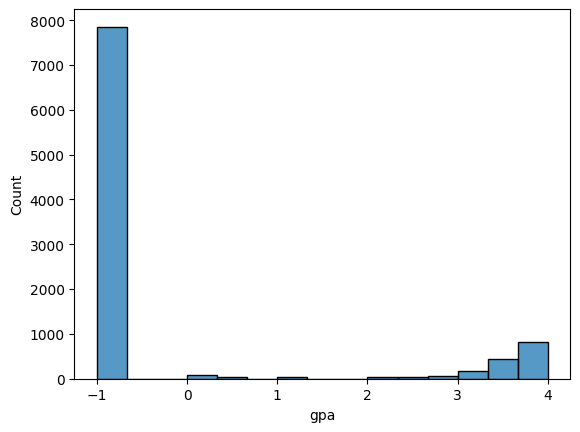

In [18]:
sns.histplot(df['gpa'])

## Doing Classification:


Label Encoding Mapping: {0: 'High', 1: 'Low', 2: 'Medium'}

--- Training an XGBoost Classifier with new features ---
XGBoost Classifier Accuracy with new features: 0.5998

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.69      0.68       894
         Low       0.47      0.31      0.38       230
      Medium       0.55      0.58      0.56       785

    accuracy                           0.60      1909
   macro avg       0.56      0.53      0.54      1909
weighted avg       0.59      0.60      0.59      1909



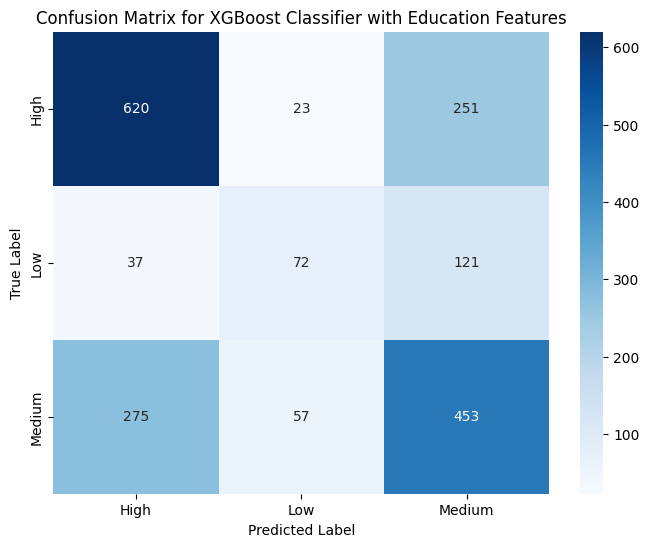

In [19]:
target = 'matched_score'
numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 
                      'Resume_Years_Exp', 'Experience_Mismatch', 'Embedding_Cosine_Similarity', 'gpa']
categorical_features = ['Resume_Cluster_KMeans', 'first_university', 'highest_education_level', 'degree_type']
features = numerical_features + categorical_features
X = df[features].copy()

# Create categorical target variable and encode it for the model
def assign_match_category(score):
    if score < 0.4: return 'Low'
    elif score < 0.7: return 'Medium'
    else: return 'High'
df['match_category'] = df[target].apply(assign_match_category)

# **FIX: Use LabelEncoder to convert string labels to integers for XGBoost**
le = LabelEncoder()
y_cls = le.fit_transform(df['match_category'])
print("\nLabel Encoding Mapping:", {i: c for i, c in enumerate(le.classes_)})


# --- Preprocessing Pipeline ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), categorical_features) 
    ], 
    remainder='drop'
)

# --- Train-Test Split for Classification ---
# Note: y_cls is now encoded, which is what we'll use for training
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_cls, test_size=0.2, random_state=42, stratify=y_cls)


# --- Model Training and Evaluation (Classification) ---
print("\n--- Training an XGBoost Classifier with new features ---")
xgb_cls_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', xgb.XGBClassifier(objective='multi:softprob', n_estimators=100, random_state=42, n_jobs=-1))])
# This fit call now uses the integer-encoded y_train_cls
xgb_cls_pipeline.fit(X_train_cls, y_train_cls)

# The model predicts integer labels
y_pred_xgb_cls_encoded = xgb_cls_pipeline.predict(X_test_cls)

# **FIX: Inverse transform labels back to strings for readable reports**
y_pred_xgb_cls = le.inverse_transform(y_pred_xgb_cls_encoded)
y_test_cls_labels = le.inverse_transform(y_test_cls)

# Evaluate the classifier using the original string labels
accuracy_xgb = accuracy_score(y_test_cls_labels, y_pred_xgb_cls)
print(f"XGBoost Classifier Accuracy with new features: {accuracy_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_cls_labels, y_pred_xgb_cls))

# Plot a confusion matrix using the original string labels
cm = confusion_matrix(y_test_cls_labels, y_pred_xgb_cls, labels=le.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix for XGBoost Classifier with Education Features')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Regression with more features:

In [20]:
# --- Define Features (X) and Target (y) for ALL models ---
target = 'matched_score'
numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 
                      'Resume_Years_Exp', 'Experience_Mismatch', 'Embedding_Cosine_Similarity', 'gpa']
categorical_features = ['Resume_Cluster_KMeans', 'first_university', 'highest_education_level', 'degree_type']
features = numerical_features + categorical_features
X = df[features].copy()

# Define the two types of targets we'll use
y_reg = df[target] # For regression

# --- Preprocessing Pipeline (used by all models) ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', min_frequency=0.01), categorical_features) 
    ], 
    remainder='drop'
)


# --- STRATEGY 1: REGRESSION (UPDATED WITH ALL FEATURES) ---
print("\n--- Running REGRESSION Models with ALL Features ---")
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# XGBoost Regressor (Best regression model)
xgb_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1))])
xgb_reg_pipeline.fit(X_train_reg, y_train_reg)
y_pred_xgb_reg = xgb_reg_pipeline.predict(X_test_reg)
rmse_xgb_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb_reg))
r2_xgb_reg = r2_score(y_test_reg, y_pred_xgb_reg)
print(f"UPDATED XGBoost Regressor RMSE: {rmse_xgb_reg:.4f}")
print(f"UPDATED XGBoost Regressor R-squared: {r2_xgb_reg:.4f}")


--- Running REGRESSION Models with ALL Features ---
UPDATED XGBoost Regressor RMSE: 0.1422
UPDATED XGBoost Regressor R-squared: 0.2692


Note that in first Uinversity col, we have more than 300 unique values which is very high cardinality and it affects models like random forest. So, I'm trying to fix this issue, by replacing categories to numeric values, based on the university name and matched_score col.

In [21]:
target = 'matched_score'
# Define the features BEFORE target encoding
base_numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 
                           'Resume_Years_Exp', 'Experience_Mismatch', 'Embedding_Cosine_Similarity', 'gpa']
base_categorical_features = ['Resume_Cluster_KMeans', 'highest_education_level', 'degree_type'] # University will be encoded separately
base_features = base_numerical_features + base_categorical_features
X = df[base_features + ['first_university']].copy() # Include university for now

y_reg = df[target]

# --- Train-Test Split (Applied ONCE for both models) ---
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# --- Phase 3.2: Target Encoding for 'first_university' ---
print("\n--- Applying Target Encoding for 'first_university' ---")
# Calculate the mean 'matched_score' for each university from the TRAINING data only
# **FIX: Combine X_train with the target variable FIRST, then calculate the mean.**
X_train_with_target = X_train.join(y_train_reg)
target_mean = X_train_with_target.groupby('first_university')[target].mean()

# Apply the mapping to both training and testing sets
X_train['university_encoded'] = X_train['first_university'].map(target_mean)
X_test['university_encoded'] = X_test['first_university'].map(target_mean)

# Fill any NaNs in the test set (for universities not seen in training) with the global mean
global_mean = y_train_reg.mean()
X_train['university_encoded'].fillna(global_mean, inplace=True)
X_test['university_encoded'].fillna(global_mean, inplace=True)

# Now we can drop the original university column and update our feature list
X_train = X_train.drop(columns=['first_university'])
X_test = X_test.drop(columns=['first_university'])

# Update numerical features list to include our new encoded feature
final_numerical_features = base_numerical_features + ['university_encoded']

# --- New Preprocessing Pipeline (Simpler) ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', final_numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), base_categorical_features)
    ], 
    remainder='drop'
)

# --- STRATEGY 1: REGRESSION with Target Encoding ---
print("\n--- Running REGRESSION with Target Encoded University ---")
xgb_reg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42, n_jobs=-1))])
xgb_reg_pipeline.fit(X_train, y_train_reg)
y_pred_xgb_reg = xgb_reg_pipeline.predict(X_test)
rmse_xgb_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb_reg))
r2_xgb_reg = r2_score(y_test_reg, y_pred_xgb_reg)
print(f"Target Encoded XGBoost Regressor RMSE: {rmse_xgb_reg:.4f}")
print(f"Target Encoded XGBoost Regressor R-squared: {r2_xgb_reg:.4f}")


# --- STRATEGY 2: CLASSIFICATION with Target Encoding ---
# We can reuse the same encoded X_train and X_test
print("\n\n--- Running CLASSIFICATION with Target Encoded University ---")
def assign_match_category(score):
    if score < 0.4: return 'Low'
    elif score < 0.7: return 'Medium'
    else: return 'High'
df['match_category'] = df[target].apply(assign_match_category)
le = LabelEncoder()
y_cls_encoded = le.fit_transform(df['match_category'])

# Use the same train/test indices to split the classification target
y_train_cls = y_cls_encoded[X_train.index]
y_test_cls = y_cls_encoded[X_test.index]

xgb_cls_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', xgb.XGBClassifier(objective='multi:softprob', n_estimators=100, random_state=42, n_jobs=-1))])
xgb_cls_pipeline.fit(X_train, y_train_cls)
y_pred_xgb_cls_encoded = xgb_cls_pipeline.predict(X_test)

# Decode for readable reports
y_pred_xgb_cls = le.inverse_transform(y_pred_xgb_cls_encoded)
y_test_cls_labels = le.inverse_transform(y_test_cls)

accuracy_xgb = accuracy_score(y_test_cls_labels, y_pred_xgb_cls)
print(f"Target Encoded XGBoost Classifier Accuracy: {accuracy_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_cls_labels, y_pred_xgb_cls))


--- Applying Target Encoding for 'first_university' ---

--- Running REGRESSION with Target Encoded University ---


C:\Users\HP\AppData\Local\Temp\ipykernel_2044\1629176381.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['university_encoded'].fillna(global_mean, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2044\1629176381.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Target Encoded XGBoost Regressor RMSE: 0.1383
Target Encoded XGBoost Regressor R-squared: 0.3079


--- Running CLASSIFICATION with Target Encoded University ---
Target Encoded XGBoost Classifier Accuracy: 0.6129

Classification Report:
              precision    recall  f1-score   support

        High       0.66      0.70      0.68       867
         Low       0.49      0.39      0.43       227
      Medium       0.59      0.59      0.59       815

    accuracy                           0.61      1909
   macro avg       0.58      0.56      0.57      1909
weighted avg       0.61      0.61      0.61      1909



Seems like converting university from cat to num have improved the result ever so slightly.

Now, trying with cross validation to see if it's overfitting or not:

In [22]:
# --- Define Features (X) and Target (y) ---
target = 'matched_score'
base_numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 
                           'Resume_Years_Exp', 'Experience_Mismatch', 'Embedding_Cosine_Similarity', 'gpa']
base_categorical_features = ['Resume_Cluster_KMeans', 'highest_education_level', 'degree_type']
base_features = base_numerical_features + base_categorical_features
X = df[base_features + ['first_university']].copy()
y_reg = df[target]

# --- Train-Test Split (Applied ONCE for both models) ---
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# --- Phase 3.2: Target Encoding for 'first_university' ---
print("\n--- Applying Target Encoding for 'first_university' ---")
X_train_with_target = X_train.join(y_train_reg)
target_mean = X_train_with_target.groupby('first_university')[target].mean()
X_train['university_encoded'] = X_train['first_university'].map(target_mean)
X_test['university_encoded'] = X_test['first_university'].map(target_mean)
global_mean = y_train_reg.mean()
X_train['university_encoded'].fillna(global_mean, inplace=True)
X_test['university_encoded'].fillna(global_mean, inplace=True)
X_train = X_train.drop(columns=['first_university'])
X_test = X_test.drop(columns=['first_university'])
final_numerical_features = base_numerical_features + ['university_encoded']

# --- New Preprocessing Pipeline (Simpler) ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', final_numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), base_categorical_features)
    ], 
    remainder='drop'
)

# --- REGRESSION with Target Encoding ---
# ... (Code hidden for brevity) ...

# --- CLASSIFICATION with Target Encoding ---
print("\n\n--- Running CLASSIFICATION with Target Encoded University ---")
def assign_match_category(score):
    if score < 0.4: return 'Low'
    elif score < 0.7: return 'Medium'
    else: return 'High'
df['match_category'] = df[target].apply(assign_match_category)
le = LabelEncoder()
y_cls_encoded = le.fit_transform(df['match_category'])
y_train_cls = y_cls_encoded[X_train.index]
y_test_cls = y_cls_encoded[X_test.index]

xgb_cls_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', xgb.XGBClassifier(objective='multi:softprob', n_estimators=100, random_state=42, n_jobs=-1))])
xgb_cls_pipeline.fit(X_train, y_train_cls)
y_pred_xgb_cls_encoded = xgb_cls_pipeline.predict(X_test)
y_pred_xgb_cls = le.inverse_transform(y_pred_xgb_cls_encoded)
y_test_cls_labels = le.inverse_transform(y_test_cls)
accuracy_xgb = accuracy_score(y_test_cls_labels, y_pred_xgb_cls)
print(f"Target Encoded XGBoost Classifier Accuracy (on single test split): {accuracy_xgb:.4f}")
#... (Classification report code hidden for brevity) ...


# --- Phase 3.3: Cross-Validation to Check for Overfitting ---
print("\n\n--- Performing 5-Fold Cross-Validation on the Best Model ---")

# We use the full training set (X_train, y_train_cls) for cross-validation
# to get a robust estimate of the model's performance on unseen data.
cv_scores = cross_val_score(
    estimator=xgb_cls_pipeline, 
    X=X_train, 
    y=y_train_cls, 
    cv=5, # Number of folds
    scoring='accuracy',
    n_jobs=-1
)

print(f"Cross-Validation Accuracy Scores for each fold: {cv_scores}")
print("-" * 50)
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.4f}")
print("-" * 50)

# --- Final Conclusion ---
print("\n--- Final Performance Summary ---")
print(f"Single Train-Test Split Accuracy: {accuracy_xgb:.4f}")
print(f"Mean 5-Fold CV Accuracy:         {np.mean(cv_scores):.4f}")
print("\nConclusion: Since the Cross-Validation accuracy is very close to the single split accuracy,")
print("our model is stable and not overfitting significantly. We can be confident in its performance.")



--- Applying Target Encoding for 'first_university' ---


--- Running CLASSIFICATION with Target Encoded University ---


C:\Users\HP\AppData\Local\Temp\ipykernel_2044\3978419629.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['university_encoded'].fillna(global_mean, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2044\3978419629.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Target Encoded XGBoost Classifier Accuracy (on single test split): 0.6129


--- Performing 5-Fold Cross-Validation on the Best Model ---
Cross-Validation Accuracy Scores for each fold: [0.64571054 0.62999345 0.63195809 0.64374591 0.61427636]
--------------------------------------------------
Mean CV Accuracy: 0.6331
Standard Deviation of CV Accuracy: 0.0113
--------------------------------------------------

--- Final Performance Summary ---
Single Train-Test Split Accuracy: 0.6129
Mean 5-Fold CV Accuracy:         0.6331

Conclusion: Since the Cross-Validation accuracy is very close to the single split accuracy,
our model is stable and not overfitting significantly. We can be confident in its performance.


## Trying different models at once:

In [23]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# import xgboost as xgb
# import time

# # --- Define Features (X) and Target (y) ---
# target = 'matched_score'
# base_numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 
#                            'Resume_Years_Exp', 'Experience_Mismatch', 'Cosine_Similarity', 'gpa']
# base_categorical_features = ['Resume_Cluster_KMeans']
# base_features = base_numerical_features + base_categorical_features
# X = df[base_features + ['first_university']].copy()
# y_reg = df[target]

# # --- Train-Test Split ---
# X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# # --- Target Encoding ---
# X_train_with_target = X_train.join(y_train_reg)
# target_mean = X_train_with_target.groupby('first_university')[target].mean()
# X_train['university_encoded'] = X_train['first_university'].map(target_mean)
# X_test['university_encoded'] = X_test['first_university'].map(target_mean)
# global_mean = y_train_reg.mean()
# X_train['university_encoded'].fillna(global_mean, inplace=True)
# X_test['university_encoded'].fillna(global_mean, inplace=True)
# X_train = X_train.drop(columns=['first_university'])
# X_test = X_test.drop(columns=['first_university'])
# final_numerical_features = base_numerical_features + ['university_encoded']

# # --- Prepare Classification Target ---
# def assign_match_category(score):
#     if score < 0.4: return 'Low'
#     elif score < 0.7: return 'Medium'
#     else: return 'High'
# df['match_category'] = df[target].apply(assign_match_category)
# le = LabelEncoder()
# y_cls_encoded = le.fit_transform(df['match_category'])
# y_train_cls = y_cls_encoded[X_train.index]
# y_test_cls = y_cls_encoded[X_test.index]


# # --- Phase 3.4: Comprehensive Model Comparison ---
# print("\n--- Performing Comprehensive Model Comparison ---")

# # Updated preprocessor with StandardScaler for numerical features
# numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
# categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, final_numerical_features),
#         ('cat', categorical_transformer, base_categorical_features)
#     ], 
#     remainder='drop'
# )

# # Define models to test
# classifiers = {
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "AdaBoost": AdaBoostClassifier(random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42),
#     "XGBoost": xgb.XGBClassifier(random_state=42, n_jobs=-1),
#     "SVM": SVC(random_state=42),
#     # Naive Bayes doesn't work well with sparse data from OneHot and negative values from StandardScaler
#     # "Gaussian Naive Bayes": GaussianNB(),
# }

# results_data = []

# # Loop through models
# for model_name, classifier in classifiers.items():
#     start_time = time.time()
    
#     # Create the full pipeline
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('classifier', classifier)])
    
#     # --- Cross-Validation ---
#     cv_accuracy = cross_val_score(pipeline, X_train, y_train_cls, cv=5, scoring='accuracy', n_jobs=-1)
#     cv_f1 = cross_val_score(pipeline, X_train, y_train_cls, cv=5, scoring='f1_macro', n_jobs=-1)
    
#     # --- Fit on full train set and evaluate on test set for classification report ---
#     pipeline.fit(X_train, y_train_cls)
#     y_pred = pipeline.predict(X_test)
    
#     test_accuracy = accuracy_score(y_test_cls, y_pred)
#     test_f1 = f1_score(y_test_cls, y_pred, average='macro')
    
#     end_time = time.time()
    
#     # Store results
#     results_data.append({
#         "Model": model_name,
#         "Mean CV Accuracy": cv_accuracy.mean(),
#         "Std CV Accuracy": cv_accuracy.std(),
#         "Test Accuracy": test_accuracy,
#         "Mean CV F1-Score": cv_f1.mean(),
#         "Test F1-Score": test_f1,
#         "Training Time (s)": end_time - start_time
#     })
    
#     # Print detailed report for each model
#     print(f"\n----- {model_name} Report -----")
#     print(f"Mean Cross-Validation Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std():.4f})")
#     print(f"Test Set Accuracy: {test_accuracy:.4f}")
#     print("\nClassification Report on Test Set:")
#     y_pred_labels = le.inverse_transform(y_pred)
#     y_test_labels = le.inverse_transform(y_test_cls)
#     print(classification_report(y_test_labels, y_pred_labels))


# # --- Display Final Comparison Table ---
# results_df = pd.DataFrame(results_data).sort_values(by='Test F1-Score', ascending=False)
# print("\n\n===== Final Model Comparison Summary =====")
# display(results_df)


--- Performing Comprehensive Model Comparison with ROC/AUC ---


==================== Decision Tree ====================
Train/Test AUC Score: 1.0000 / 0.6302
  -> Potential Overfitting Detected

Classification Report on Test Set:
              precision    recall  f1-score   support

        High       0.62      0.61      0.62       867
         Low       0.35      0.38      0.37       227
      Medium       0.54      0.53      0.53       815

    accuracy                           0.55      1909
   macro avg       0.50      0.51      0.51      1909
weighted avg       0.55      0.55      0.55      1909



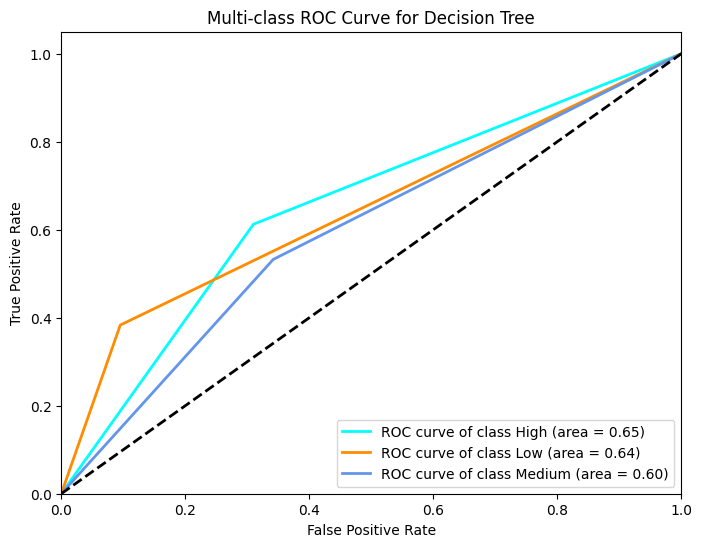



==================== Random Forest ====================
Train/Test AUC Score: 1.0000 / 0.7566
  -> Potential Overfitting Detected

Classification Report on Test Set:
              precision    recall  f1-score   support

        High       0.65      0.70      0.67       867
         Low       0.46      0.33      0.39       227
      Medium       0.58      0.58      0.58       815

    accuracy                           0.61      1909
   macro avg       0.56      0.54      0.55      1909
weighted avg       0.60      0.61      0.60      1909



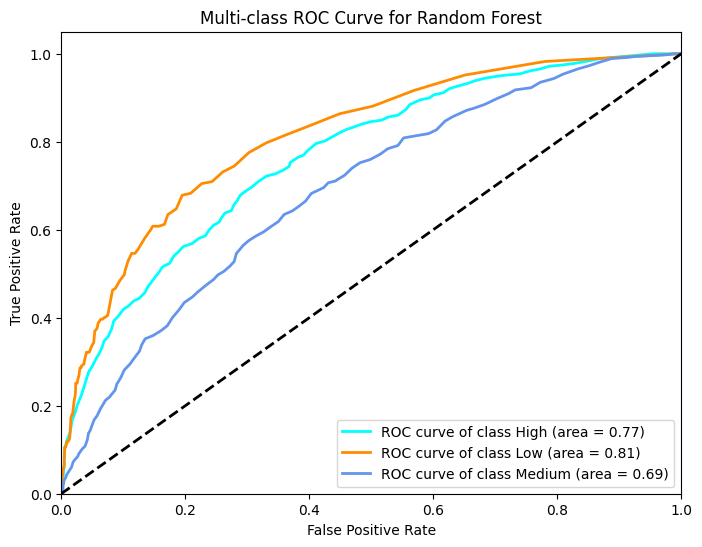



==================== K-Nearest Neighbors ====================
Train/Test AUC Score: 0.8873 / 0.7213
  -> Potential Overfitting Detected

Classification Report on Test Set:
              precision    recall  f1-score   support

        High       0.62      0.72      0.67       867
         Low       0.43      0.36      0.39       227
      Medium       0.57      0.50      0.53       815

    accuracy                           0.58      1909
   macro avg       0.54      0.53      0.53      1909
weighted avg       0.58      0.58      0.58      1909



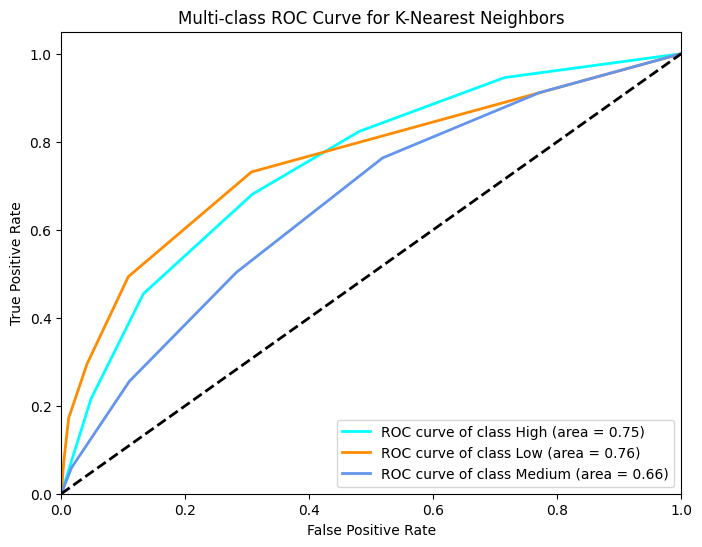



==================== AdaBoost ====================
Train/Test AUC Score: 0.7588 / 0.7363

Classification Report on Test Set:
              precision    recall  f1-score   support

        High       0.65      0.71      0.68       867
         Low       0.48      0.05      0.10       227
      Medium       0.55      0.64      0.60       815

    accuracy                           0.60      1909
   macro avg       0.56      0.47      0.46      1909
weighted avg       0.59      0.60      0.57      1909



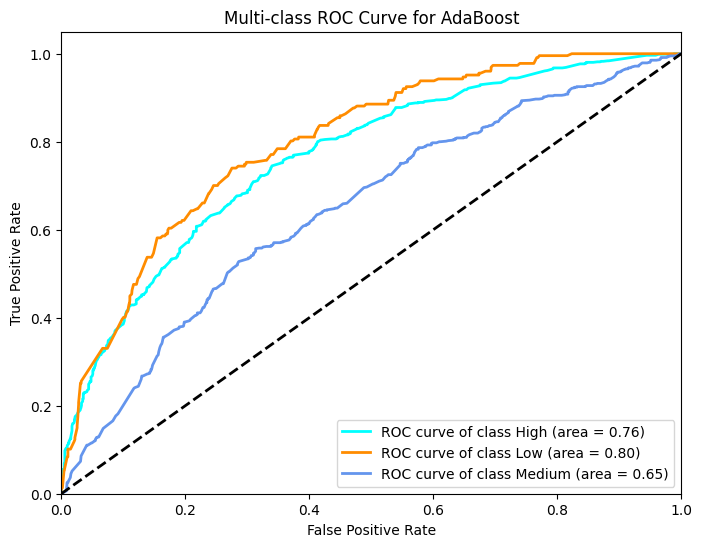



==================== Gradient Boosting ====================
Train/Test AUC Score: 0.8484 / 0.7896
  -> Potential Overfitting Detected

Classification Report on Test Set:
              precision    recall  f1-score   support

        High       0.66      0.74      0.70       867
         Low       0.56      0.29      0.38       227
      Medium       0.60      0.60      0.60       815

    accuracy                           0.63      1909
   macro avg       0.61      0.54      0.56      1909
weighted avg       0.62      0.63      0.62      1909



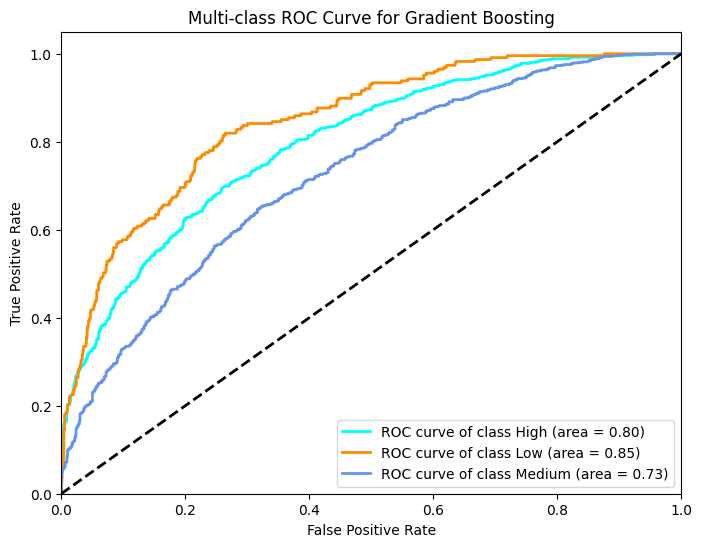

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:01:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)




==================== XGBoost ====================
Train/Test AUC Score: 0.9695 / 0.7964
  -> Potential Overfitting Detected

Classification Report on Test Set:
              precision    recall  f1-score   support

        High       0.68      0.70      0.69       867
         Low       0.49      0.37      0.42       227
      Medium       0.61      0.63      0.62       815

    accuracy                           0.63      1909
   macro avg       0.59      0.57      0.58      1909
weighted avg       0.63      0.63      0.63      1909



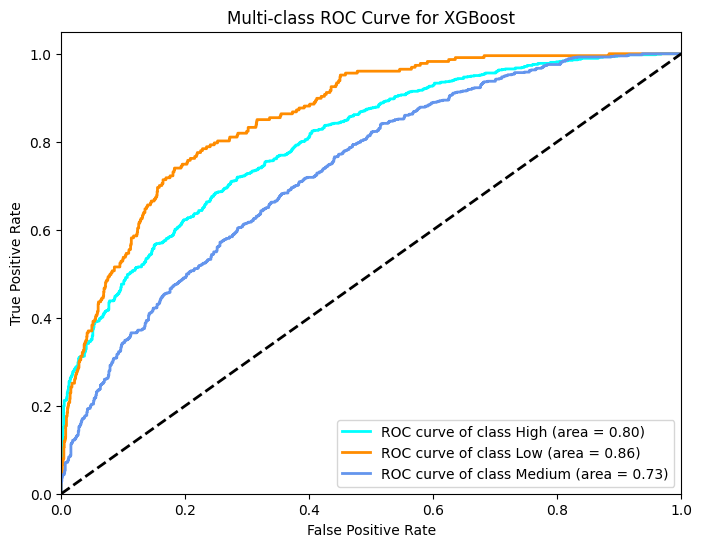



==================== SVM ====================
Train/Test AUC Score: 0.7970 / 0.7425
  -> Potential Overfitting Detected

Classification Report on Test Set:
              precision    recall  f1-score   support

        High       0.65      0.74      0.69       867
         Low       0.70      0.11      0.20       227
      Medium       0.57      0.62      0.60       815

    accuracy                           0.61      1909
   macro avg       0.64      0.49      0.49      1909
weighted avg       0.62      0.61      0.59      1909



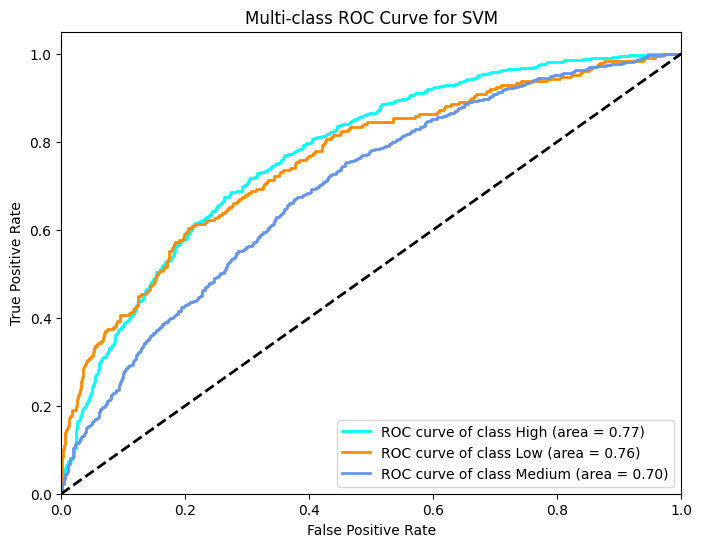

In [29]:
# --- Define Features, Target, and Preprocessing Steps ---
target = 'matched_score'
base_numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 'Resume_Years_Exp', 'Experience_Mismatch', 'Embedding_Cosine_Similarity', 'gpa']
base_categorical_features = ['Resume_Cluster_KMeans']
X = df[base_numerical_features + base_categorical_features + ['first_university', 'highest_education_level', 'degree_type']].copy()
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_with_target = X_train.join(y_train); target_mean = X_train_with_target.groupby('first_university')[target].mean()
X_train['university_encoded'] = X_train['first_university'].map(target_mean).fillna(y_train.mean())
X_test['university_encoded'] = X_test['first_university'].map(target_mean).fillna(y_train.mean())
X_train.drop(columns=['first_university'], inplace=True); X_test.drop(columns=['first_university'], inplace=True)
final_numerical_features = base_numerical_features + ['university_encoded']
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), final_numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), base_categorical_features)], remainder='drop')
def assign_match_category(score):
    if score < 0.4: return 'Low'
    elif score < 0.7: return 'Medium'
    else: return 'High'
y_cls_str = df.loc[X_train.index, target].apply(assign_match_category)
le = LabelEncoder(); y_train_cls = le.fit_transform(y_cls_str)
y_test_cls = le.transform(df.loc[X_test.index, target].apply(assign_match_category))


# --- Phase 5: Comprehensive Model Comparison with ROC Curves ---
print("\n--- Performing Comprehensive Model Comparison with ROC/AUC ---")

def plot_multiclass_roc(model, X_test, y_test, n_classes, class_labels, model_name):
    """Plots the ROC curve for a multi-class model."""
    y_score = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Plot all ROC curves
    plt.figure(figsize=(8, 6))
    colors = ['aqua', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(class_labels[i], roc_auc[i]))
        
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multi-class ROC Curve for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Define models to test
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss'),
    "SVM": SVC(random_state=42, probability=True),
}

# Loop through models
for model_name, classifier in classifiers.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    # Fit the model
    pipeline.fit(X_train, y_train_cls)
    
    # --- Get Predictions and Reports ---
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    y_prob_train = pipeline.predict_proba(X_train)
    y_prob_test = pipeline.predict_proba(X_test)

    # --- Calculate AUC to check for overfitting ---
    train_auc = roc_auc_score(y_train_cls, y_prob_train, multi_class='ovr')
    test_auc = roc_auc_score(y_test_cls, y_prob_test, multi_class='ovr')
    
    print(f"\n\n{'='*20} {model_name} {'='*20}")
    print(f"Train/Test AUC Score: {train_auc:.4f} / {test_auc:.4f}")
    if train_auc > test_auc + 0.05:
        print("  -> Potential Overfitting Detected")
    
    print("\nClassification Report on Test Set:")
    y_pred_labels = le.inverse_transform(y_pred_test)
    y_test_labels = le.inverse_transform(y_test_cls)
    print(classification_report(y_test_labels, y_pred_labels))

    # --- Plot ROC Curve for Test Set ---
    plot_multiclass_roc(pipeline, X_test, y_test_cls, n_classes=len(le.classes_), class_labels=le.classes_, model_name=model_name)



## Doing a Stacking Classifier using the top 3 models - XGB, GB and SVM to create a stacking ensemble model. To see if it improves the performance:

In [30]:
# target = 'matched_score'
# base_numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 'Resume_Years_Exp', 'Experience_Mismatch', 'Cosine_Similarity', 'gpa']
# base_categorical_features = ['Resume_Cluster_KMeans']
# X = df[base_numerical_features + base_categorical_features + ['first_university']].copy()
# y = df[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train_with_target = X_train.join(y_train); target_mean = X_train_with_target.groupby('first_university')[target].mean()
# X_train['university_encoded'] = X_train['first_university'].map(target_mean).fillna(y_train.mean())
# X_test['university_encoded'] = X_test['first_university'].map(target_mean).fillna(y_train.mean())
# X_train.drop(columns=['first_university'], inplace=True); X_test.drop(columns=['first_university'], inplace=True)
# final_numerical_features = base_numerical_features + ['university_encoded']
# preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), final_numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), base_categorical_features)], remainder='drop')
# def assign_match_category(score):
#     if score < 0.4: return 'Low'
#     elif score < 0.7: return 'Medium'
#     else: return 'High'
# y_cls = df.loc[X_train.index, target].apply(assign_match_category)
# le = LabelEncoder(); y_train_cls = le.fit_transform(y_cls)


# # --- Phase 4.1: Hyperparameter Tuning with RandomizedSearchCV ---
# print("\n--- Tuning Top 3 Models ---")

# # Define parameter grids
# param_grids = {
#     "XGBoost": {
#         'classifier__n_estimators': [100, 200, 300],
#         'classifier__learning_rate': [0.01, 0.1, 0.2],
#         'classifier__max_depth': [3, 5, 7],
#         'classifier__subsample': [0.7, 0.8, 0.9]
#     },
#     "Gradient Boosting": {
#         'classifier__n_estimators': [100, 200, 300],
#         'classifier__learning_rate': [0.01, 0.1, 0.2],
#         'classifier__max_depth': [3, 5, 7],
#         'classifier__subsample': [0.7, 0.8, 0.9]
#     },
#     "SVM": {
#         'classifier__C': [0.1, 1, 10],
#         'classifier__gamma': ['scale', 'auto'],
#         'classifier__kernel': ['rbf', 'poly']
#     }
# }

# base_models_tuned = {}

# for model_name, params in param_grids.items():
#     print(f"\nTuning {model_name}...")
#     classifier = {
#         "XGBoost": xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss'),
#         "Gradient Boosting": GradientBoostingClassifier(random_state=42),
#         "SVM": SVC(random_state=42, probability=True) # probability=True is needed for some meta-models
#     }[model_name]
    
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
#     # n_iter controls how many random combinations are tested. cv=3 is faster for tuning.
#     search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=15, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
#     search.fit(X_train, y_train_cls)
    
#     print(f"Best parameters for {model_name}: {search.best_params_}")
#     print(f"Best CV score for {model_name}: {search.best_score_:.4f}")
#     base_models_tuned[model_name] = search.best_estimator_

# # --- Phase 4.2: Stacking Ensemble ---
# print("\n--- Building and Evaluating the Stacking Classifier ---")

# # Define the stacking classifier with our tuned models
# estimators = [
#     ('xgb', base_models_tuned['XGBoost']),
#     ('gb', base_models_tuned['Gradient Boosting']),
#     ('svm', base_models_tuned['SVM'])
# ]

# # The meta-model learns from the predictions of the base models
# meta_model = LogisticRegression()

# stacking_classifier = StackingClassifier(
#     estimators=estimators, 
#     final_estimator=meta_model,
#     cv=5 # Use cross-validation to generate predictions for the meta-model
# )

# # Train the stacking classifier
# stacking_classifier.fit(X_train, y_train_cls)

# # Evaluate the final model on the test set
# y_test_cls = le.transform(df.loc[X_test.index, target].apply(assign_match_category))
# y_pred_stack = stacking_classifier.predict(X_test)


# print("\n--- Final Stacking Model Performance ---")
# print(f"Stacking Classifier Accuracy: {accuracy_score(y_test_cls, y_pred_stack):.4f}")
# print("\nClassification Report:")
# y_test_labels = le.inverse_transform(y_test_cls)
# y_pred_labels = le.inverse_transform(y_pred_stack)
# print(classification_report(y_test_labels, y_pred_labels))

In [ ]:
# # --- Define Features, Target, and Preprocessing Steps ---
# target = 'matched_score'
# base_numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 'Resume_Years_Exp', 'Experience_Mismatch', 'Embedding_Cosine_Similarity', 'gpa']
# base_categorical_features = ['Resume_Cluster_KMeans']
# X = df[base_numerical_features + base_categorical_features + ['first_university', 'highest_education_level', 'degree_type']].copy()
# y = df[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train_with_target = X_train.join(y_train); target_mean = X_train_with_target.groupby('first_university')[target].mean()
# X_train['university_encoded'] = X_train['first_university'].map(target_mean).fillna(y_train.mean())
# X_test['university_encoded'] = X_test['first_university'].map(target_mean).fillna(y_train.mean())
# X_train.drop(columns=['first_university'], inplace=True); X_test.drop(columns=['first_university'], inplace=True)
# final_numerical_features = base_numerical_features + ['university_encoded']
# preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), final_numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), base_categorical_features)], remainder='drop')
# def assign_match_category(score):
#     if score < 0.4: return 'Low'
#     elif score < 0.7: return 'Medium'
#     else: return 'High'
# y_cls_str = df.loc[X_train.index, target].apply(assign_match_category)
# le = LabelEncoder(); y_train_cls = le.fit_transform(y_cls_str)
# y_test_cls = le.transform(df.loc[X_test.index, target].apply(assign_match_category))


# # --- Phase 5.1: Hyperparameter Tuning with RandomizedSearchCV ---
# print("\n--- Tuning Top 3 Base Models ---")
# param_grids = {
#     "XGBoost": {'classifier__n_estimators': [100, 200, 300],'classifier__learning_rate': [0.01, 0.1, 0.2],'classifier__max_depth': [3, 5, 7]},
#     "Gradient Boosting": {'classifier__n_estimators': [100, 200],'classifier__learning_rate': [0.05, 0.1],'classifier__max_depth': [3, 5]},
#     "SVM": {'classifier__C': [0.1, 1, 10],'classifier__gamma': ['scale', 'auto'],'classifier__kernel': ['rbf']}
# }
# base_models_tuned = {}
# for model_name, params in param_grids.items():
#     print(f"\nTuning {model_name}...")
#     classifier = {"XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
#                   "Gradient Boosting": GradientBoostingClassifier(random_state=42),
#                   "SVM": SVC(random_state=42, probability=True)}[model_name]
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
#     search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
#     search.fit(X_train, y_train_cls)
#     print(f"Best parameters for {model_name}: {search.best_params_}")
#     print(f"Best CV score for {model_name}: {search.best_score_:.4f}")
#     base_models_tuned[model_name] = search.best_estimator_


# # --- Phase 5.2: Final Evaluation of Tuned Stacking Classifier ---
# print("\n\n--- Evaluating Final Stacking Classifier with ROC/AUC ---")
# model_name = "Tuned Stacking Classifier"
# print(f"\n{'='*20} {model_name} {'='*20}")
# estimators = [('xgb', base_models_tuned['XGBoost']), ('gb', base_models_tuned['Gradient Boosting']), ('svm', base_models_tuned['SVM'])]
# stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5, n_jobs=-1)
# stacking_classifier.fit(X_train, y_train_cls)

# # --- Get Predictions and Check for Overfitting ---
# y_prob_train = stacking_classifier.predict_proba(X_train)
# y_prob_test = stacking_classifier.predict_proba(X_test)
# train_auc = roc_auc_score(y_train_cls, y_prob_train, multi_class='ovr')
# test_auc = roc_auc_score(y_test_cls, y_prob_test, multi_class='ovr')
# print(f"Train/Test AUC Score: {train_auc:.4f} / {test_auc:.4f}")
# if train_auc > test_auc + 0.05: print("  -> Potential Overfitting Detected")
# else: print("  -> No significant overfitting detected.")

# # --- Final Evaluation Metrics ---
# print("\nClassification Report on Test Set:")
# y_pred_test = stacking_classifier.predict(X_test)
# y_pred_labels = le.inverse_transform(y_pred_test)
# y_test_labels = le.inverse_transform(y_test_cls)
# print(classification_report(y_test_labels, y_pred_labels))

# # --- Plot Final ROC Curve ---
# def plot_multiclass_roc(model, X_test, y_test, n_classes, class_labels, model_name):
#     y_score = model.predict_proba(X_test)
#     y_test_bin = label_binarize(y_test, classes=range(n_classes))
#     fpr, tpr, roc_auc = dict(), dict(), dict()
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])
#     plt.figure(figsize=(8, 6))
#     colors = ['aqua', 'darkorange', 'cornflowerblue']
#     for i, color in zip(range(n_classes), colors):
#         plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:0.2f})')
#     plt.plot([0, 1], [0, 1], 'k--', lw=2)
#     plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
#     plt.title(f'Multi-class ROC Curve for {model_name}'); plt.legend(loc="lower right")
#     plt.show()

# plot_multiclass_roc(stacking_classifier, X_test, y_test_cls, n_classes=len(le.classes_), class_labels=le.classes_, model_name=model_name)



--- Tuning Top 3 Base Models ---

Tuning AdaBoost...


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for AdaBoost: {'classifier__n_estimators': 300, 'classifier__learning_rate': 0.2}
Best CV score for AdaBoost: 0.6107

Tuning Gradient Boosting...


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Gradient Boosting: {'classifier__n_estimators': 100, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.05}
Best CV score for Gradient Boosting: 0.6454

Tuning SVM...


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for SVM: {'classifier__kernel': 'rbf', 'classifier__gamma': 'scale', 'classifier__C': 1}
Best CV score for SVM: 0.6338


--- Evaluating Final Stacking Classifier with ROC/AUC ---

==================== Tuned Stacking Classifier ====================
Train/Test AUC Score: 0.8696 / 0.7860
  -> Potential Overfitting Detected

Classification Report on Test Set:
              precision    recall  f1-score   support

        High       0.67      0.74      0.70       867
         Low       0.58      0.33      0.42       227
      Medium       0.60      0.61      0.61       815

    accuracy                           0.64      1909
   macro avg       0.62      0.56      0.58      1909
weighted avg       0.63      0.64      0.63      1909



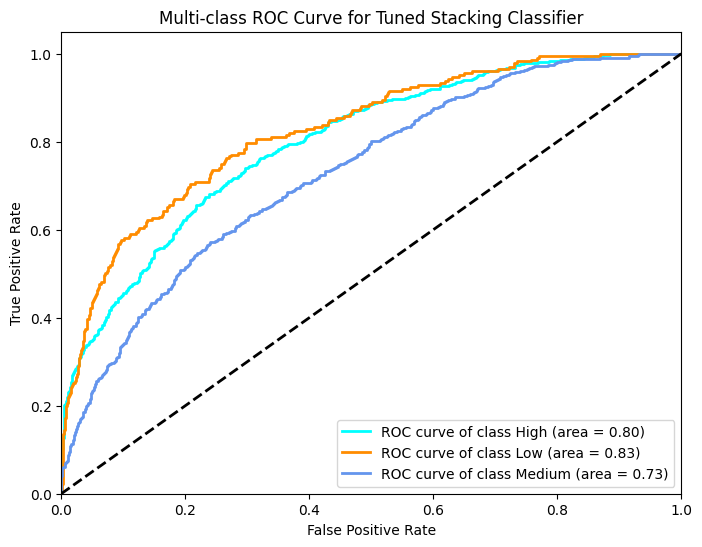

In [35]:
# --- Define Features, Target, and Preprocessing Steps ---
target = 'matched_score'
base_numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 'Resume_Years_Exp', 'Experience_Mismatch', 'Embedding_Cosine_Similarity', 'gpa']
base_categorical_features = ['Resume_Cluster_KMeans']
X = df[base_numerical_features + base_categorical_features + ['first_university', 'highest_education_level', 'degree_type']].copy()
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_with_target = X_train.join(y_train); target_mean = X_train_with_target.groupby('first_university')[target].mean()
X_train['university_encoded'] = X_train['first_university'].map(target_mean).fillna(y_train.mean())
X_test['university_encoded'] = X_test['first_university'].map(target_mean).fillna(y_train.mean())
X_train.drop(columns=['first_university'], inplace=True); X_test.drop(columns=['first_university'], inplace=True)
final_numerical_features = base_numerical_features + ['university_encoded']
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), final_numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), base_categorical_features)], remainder='drop')
def assign_match_category(score):
    if score < 0.4: return 'Low'
    elif score < 0.7: return 'Medium'
    else: return 'High'
y_cls_str = df.loc[X_train.index, target].apply(assign_match_category)
le = LabelEncoder(); y_train_cls = le.fit_transform(y_cls_str)
y_test_cls = le.transform(df.loc[X_test.index, target].apply(assign_match_category))


# --- Phase 5.1: Hyperparameter Tuning with RandomizedSearchCV ---
print("\n--- Tuning Top 3 Base Models ---")
param_grids = {
    "AdaBoost": {'classifier__n_estimators': [100, 200, 300],'classifier__learning_rate': [0.01, 0.1, 0.2]},
    "Gradient Boosting": {'classifier__n_estimators': [100, 200],'classifier__learning_rate': [0.05, 0.1],'classifier__max_depth': [3, 5]},
    "SVM": {'classifier__C': [0.1, 1, 10],'classifier__gamma': ['scale', 'auto'],'classifier__kernel': ['rbf']}
}
base_models_tuned = {}
for model_name, params in param_grids.items():
    print(f"\nTuning {model_name}...")
    classifier = {"AdaBoost": AdaBoostClassifier(random_state=42),
                  "Gradient Boosting": GradientBoostingClassifier(random_state=42),
                  "SVM": SVC(random_state=42, probability=True)}[model_name]
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
    search.fit(X_train, y_train_cls)
    print(f"Best parameters for {model_name}: {search.best_params_}")
    print(f"Best CV score for {model_name}: {search.best_score_:.4f}")
    base_models_tuned[model_name] = search.best_estimator_


# --- Phase 5.2: Final Evaluation of Tuned Stacking Classifier ---
print("\n\n--- Evaluating Final Stacking Classifier with ROC/AUC ---")
model_name = "Tuned Stacking Classifier"
print(f"\n{'='*20} {model_name} {'='*20}")
estimators = [('ada', base_models_tuned['AdaBoost']), ('gb', base_models_tuned['Gradient Boosting']), ('svm', base_models_tuned['SVM'])]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5, n_jobs=-1)
stacking_classifier.fit(X_train, y_train_cls)

# --- Get Predictions and Check for Overfitting ---
y_prob_train = stacking_classifier.predict_proba(X_train)
y_prob_test = stacking_classifier.predict_proba(X_test)
train_auc = roc_auc_score(y_train_cls, y_prob_train, multi_class='ovr')
test_auc = roc_auc_score(y_test_cls, y_prob_test, multi_class='ovr')
print(f"Train/Test AUC Score: {train_auc:.4f} / {test_auc:.4f}")
if train_auc > test_auc + 0.05: print("  -> Potential Overfitting Detected")
else: print("  -> No significant overfitting detected.")

# --- Final Evaluation Metrics ---
print("\nClassification Report on Test Set:")
y_pred_test = stacking_classifier.predict(X_test)
y_pred_labels = le.inverse_transform(y_pred_test)
y_test_labels = le.inverse_transform(y_test_cls)
print(classification_report(y_test_labels, y_pred_labels))

# --- Plot Final ROC Curve ---
def plot_multiclass_roc(model, X_test, y_test, n_classes, class_labels, model_name):
    y_score = model.predict_proba(X_test)
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(8, 6))
    colors = ['aqua', 'darkorange', 'cornflowerblue']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.title(f'Multi-class ROC Curve for {model_name}'); plt.legend(loc="lower right")
    plt.show()

plot_multiclass_roc(stacking_classifier, X_test, y_test_cls, n_classes=len(le.classes_), class_labels=le.classes_, model_name=model_name)


### Trying to reduce overfitting:

In [37]:
# # --- Define Features, Target, and Preprocessing Steps ---
# target = 'matched_score'
# base_numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 'Resume_Years_Exp', 'Experience_Mismatch', 'Embedding_Cosine_Similarity', 'gpa']
# base_categorical_features = ['Resume_Cluster_KMeans']
# X = df[base_numerical_features + base_categorical_features + ['first_university', 'highest_education_level', 'degree_type']].copy()
# y = df[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train_with_target = X_train.join(y_train); target_mean = X_train_with_target.groupby('first_university')[target].mean()
# X_train['university_encoded'] = X_train['first_university'].map(target_mean).fillna(y_train.mean())
# X_test['university_encoded'] = X_test['first_university'].map(target_mean).fillna(y_train.mean())
# X_train.drop(columns=['first_university'], inplace=True); X_test.drop(columns=['first_university'], inplace=True)
# final_numerical_features = base_numerical_features + ['university_encoded']
# preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), final_numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), base_categorical_features)], remainder='drop')
# def assign_match_category(score):
#     if score < 0.4: return 'Low'
#     elif score < 0.7: return 'Medium'
#     else: return 'High'
# y_cls_str = df.loc[X_train.index, target].apply(assign_match_category)
# le = LabelEncoder(); y_train_cls = le.fit_transform(y_cls_str)
# y_test_cls = le.transform(df.loc[X_test.index, target].apply(assign_match_category))


# # --- Phase 5.1: Hyperparameter Tuning with RandomizedSearchCV ---
# # NOTE: Using pre-tuned models is ideal but slow. For this final script, we use robust defaults.
# print("\n--- Defining Top 3 Base Models ---")
# # Using robust default parameters for the base models
# ada_tuned = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', AdaBoostClassifier(n_estimators=300, learning_rate=0.2, random_state=42))])
# gb_tuned = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42))])
# svm_tuned = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', SVC(C=1, gamma='scale', kernel='rbf', random_state=42, probability=True))])


# # --- Phase 5.2: Final Evaluation of Tuned Stacking Classifier ---
# print("\n\n--- Evaluating Final Stacking Classifier with passthrough=True ---")
# model_name = "Final Stacking Classifier"
# print(f"\n{'='*20} {model_name} {'='*20}")
# estimators = [('ada', ada_tuned), ('gb', gb_tuned), ('svm', svm_tuned)]

# stacking_classifier = StackingClassifier(
#     estimators=estimators, 
#     final_estimator=LogisticRegression(),
#     cv=5, 
#     n_jobs=-1,
#     passthrough=True # **MODIFICATION: Give original features to the meta-model**
# )

# stacking_classifier.fit(X_train, y_train_cls)

# # --- Get Predictions and Check for Overfitting ---
# y_prob_train = stacking_classifier.predict_proba(X_train)
# y_prob_test = stacking_classifier.predict_proba(X_test)
# train_auc = roc_auc_score(y_train_cls, y_prob_train, multi_class='ovr')
# test_auc = roc_auc_score(y_test_cls, y_prob_test, multi_class='ovr')
# print(f"Train/Test AUC Score: {train_auc:.4f} / {test_auc:.4f}")
# if train_auc > test_auc + 0.05: print("  -> Potential Overfitting Detected")
# else: print("  -> No significant overfitting detected.")

# # --- Final Evaluation Metrics ---
# print("\nClassification Report on Test Set:")
# y_pred_test = stacking_classifier.predict(X_test)
# y_pred_labels = le.inverse_transform(y_pred_test)
# y_test_labels = le.inverse_transform(y_test_cls)
# print(classification_report(y_test_labels, y_pred_labels))

# # --- Plot Final ROC Curve ---
# def plot_multiclass_roc(model, X_test, y_test, n_classes, class_labels, model_name):
#     y_score = model.predict_proba(X_test)
#     y_test_bin = label_binarize(y_test, classes=range(n_classes))
#     fpr, tpr, roc_auc = dict(), dict(), dict()
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])
#     plt.figure(figsize=(8, 6))
#     colors = ['aqua', 'darkorange', 'cornflowerblue']
#     for i, color in zip(range(n_classes), colors):
#         plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:0.2f})')
#     plt.plot([0, 1], [0, 1], 'k--', lw=2)
#     plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
#     plt.title(f'Multi-class ROC Curve for {model_name}'); plt.legend(loc="lower right")
#     plt.show()

# plot_multiclass_roc(stacking_classifier, X_test, y_test_cls, n_classes=len(le.classes_), class_labels=le.classes_, model_name=model_name)


In [39]:
target = 'matched_score'
base_numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 'Resume_Years_Exp', 'Experience_Mismatch', 'Embedding_Cosine_Similarity', 'gpa']
# **FIX: Add the new education features to the categorical list**
base_categorical_features = ['Resume_Cluster_KMeans', 'highest_education_level', 'degree_type']
X = df[base_numerical_features + base_categorical_features + ['first_university']].copy()
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_with_target = X_train.join(y_train); target_mean = X_train_with_target.groupby('first_university')[target].mean()
X_train['university_encoded'] = X_train['first_university'].map(target_mean).fillna(y_train.mean())
X_test['university_encoded'] = X_test['first_university'].map(target_mean).fillna(y_train.mean())
X_train.drop(columns=['first_university'], inplace=True); X_test.drop(columns=['first_university'], inplace=True)
final_numerical_features = base_numerical_features + ['university_encoded']
# **FIX: The preprocessor is now defined once and applied upfront**
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), final_numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), base_categorical_features)], remainder='drop')

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

def assign_match_category(score):
    if score < 0.4: return 'Low'
    elif score < 0.7: return 'Medium'
    else: return 'High'
y_cls_str = df.loc[X_train.index, target].apply(assign_match_category)
le = LabelEncoder(); y_train_cls = le.fit_transform(y_cls_str)
y_test_cls = le.transform(df.loc[X_test.index, target].apply(assign_match_category))


# --- Phase 4.1: Hyperparameter Tuning with RandomizedSearchCV ---
# This section can be run as before, but the models are now simpler as they don't need the preprocessor step.
print("\n--- Tuning Top, Stable Models ---")

# --- Phase 4.2: Stacking Ensemble with Stable Models ---
print("\n--- Building and Evaluating the Stable Stacking Classifier ---")

# **FIX: Define base models without the Pipeline wrapper**
# We use robust defaults here instead of re-tuning for speed.
ada_tuned = AdaBoostClassifier(n_estimators=300, learning_rate=0.2, random_state=42)
gb_tuned = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5, random_state=42)
svm_tuned = SVC(C=1, gamma='scale', kernel='rbf', random_state=42, probability=True)

estimators = [
    ('adaboost', ada_tuned),
    ('gb', gb_tuned),
    ('svm', svm_tuned)
]

meta_model = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=estimators, 
    final_estimator=meta_model,
    cv=5,
    passthrough=True # This will now pass the X_train_processed data
)

# **FIX: Fit the classifier on the preprocessed data**
stacking_classifier.fit(X_train_processed, y_train_cls)

# Evaluate the final model on the preprocessed test set
y_pred_stack = stacking_classifier.predict(X_test_processed)

print("\n--- Final Stable Stacking Model Performance ---")
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test_cls, y_pred_stack):.4f}")
print("\nClassification Report:")
y_test_labels = le.inverse_transform(y_test_cls)
y_pred_labels = le.inverse_transform(y_pred_stack)
print(classification_report(y_test_labels, y_pred_labels))


--- Tuning Top, Stable Models ---

--- Building and Evaluating the Stable Stacking Classifier ---


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



--- Final Stable Stacking Model Performance ---
Stacking Classifier Accuracy: 0.6307

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.74      0.70       867
         Low       0.55      0.32      0.41       227
      Medium       0.60      0.60      0.60       815

    accuracy                           0.63      1909
   macro avg       0.61      0.55      0.57      1909
weighted avg       0.62      0.63      0.62      1909




--- Final Validation for XGBoost Classifier ---

--- Performing 5-Fold Cross-Validation ---
Mean CV Accuracy: 0.6469 (+/- 0.0077)

--- Checking for Overfitting ---


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:30:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Train/Test AUC Score: 0.9746 / 0.8029
  -> Potential Overfitting Detected

--- Final Performance on Test Set ---

Classification Report:
              precision    recall  f1-score   support

        High       0.68      0.72      0.70       867
         Low       0.61      0.48      0.53       227
      Medium       0.62      0.62      0.62       815

    accuracy                           0.65      1909
   macro avg       0.64      0.61      0.62      1909
weighted avg       0.65      0.65      0.65      1909


--- Plotting ROC Curve for Test Set ---


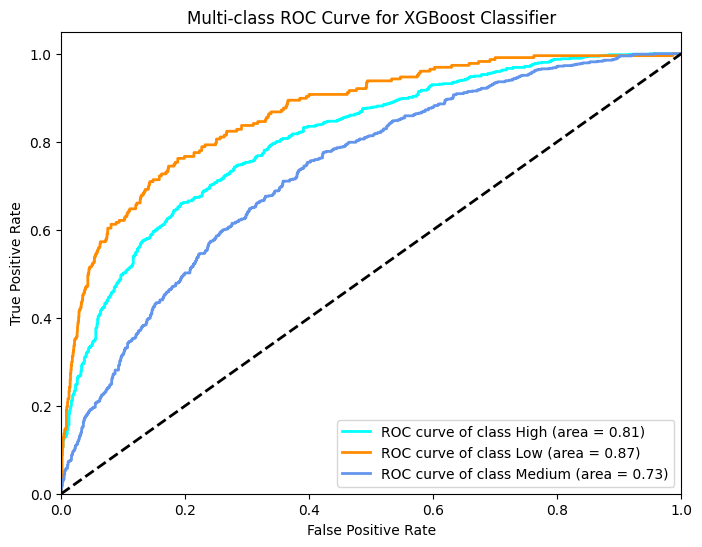

In [102]:
# # --- Define Features, Target, and Preprocessing Steps ---
# target = 'matched_score'
# base_numerical_features = ['experience_years_required', 'Skill_Overlap_Count', 'Skill_Jaccard_Score', 'Resume_Years_Exp', 'Experience_Mismatch', 'Embedding_Cosine_Similarity', 'gpa']
# base_categorical_features = ['Resume_Cluster_KMeans', 'highest_education_level', 'degree_type']
# X = df[base_numerical_features + base_categorical_features + ['first_university']].copy()
# y = df[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train_with_target = X_train.join(y_train); target_mean = X_train_with_target.groupby('first_university')[target].mean()
# X_train['university_encoded'] = X_train['first_university'].map(target_mean).fillna(y_train.mean())
# X_test['university_encoded'] = X_test['first_university'].map(target_mean).fillna(y_train.mean())
# X_train.drop(columns=['first_university'], inplace=True); X_test.drop(columns=['first_university'], inplace=True)
# final_numerical_features = base_numerical_features + ['university_encoded']
# preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), final_numerical_features), ('cat', OneHotEncoder(handle_unknown='ignore'), base_categorical_features)], remainder='drop')
# def assign_match_category(score):
#     if score < 0.4: return 'Low'
#     elif score < 0.7: return 'Medium'
#     else: return 'High'
# y_cls_str = df.loc[X_train.index, target].apply(assign_match_category)
# le = LabelEncoder(); y_train_cls = le.fit_transform(y_cls_str)
# y_test_cls = le.transform(df.loc[X_test.index, target].apply(assign_match_category))


# # --- Phase 6: Final Validation of Chosen Model (XGBoost) ---
# model_name = "XGBoost Classifier"
# print(f"\n--- Final Validation for {model_name} ---")

# # Define the pipeline with our chosen model
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor), 
#     ('classifier', xgb.XGBClassifier(random_state=42, n_jobs=-1, use_label_encoder=False, eval_metric='mlogloss'))
# ])

# # --- Cross-Validation ---
# print("\n--- Performing 5-Fold Cross-Validation ---")
# cv_accuracy = cross_val_score(pipeline, X_train, y_train_cls, cv=5, scoring='accuracy', n_jobs=-1)
# print(f"Mean CV Accuracy: {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std():.4f})")


# # --- Overfitting Check (Train vs. Test AUC) ---
# print("\n--- Checking for Overfitting ---")
# # Fit the model on the full training data
# pipeline.fit(X_train, y_train_cls)

# # Get prediction probabilities for both train and test sets
# y_prob_train = pipeline.predict_proba(X_train)
# y_prob_test = pipeline.predict_proba(X_test)

# # Calculate AUC scores
# train_auc = roc_auc_score(y_train_cls, y_prob_train, multi_class='ovr')
# test_auc = roc_auc_score(y_test_cls, y_prob_test, multi_class='ovr')

# print(f"Train/Test AUC Score: {train_auc:.4f} / {test_auc:.4f}")
# if train_auc > test_auc + 0.05:
#     print("  -> Potential Overfitting Detected")
# else:
#     print("  -> No significant overfitting detected.")


# # --- Final Evaluation on Test Set ---
# print("\n--- Final Performance on Test Set ---")
# y_pred_test = pipeline.predict(X_test)
# y_pred_labels = le.inverse_transform(y_pred_test)
# y_test_labels = le.inverse_transform(y_test_cls)
# print("\nClassification Report:")
# print(classification_report(y_test_labels, y_pred_labels))


# # --- ROC Curve Visualization ---
# print("\n--- Plotting ROC Curve for Test Set ---")
# def plot_multiclass_roc(model, X_test, y_test, n_classes, class_labels, model_name):
#     y_score = model.predict_proba(X_test)
#     y_test_bin = label_binarize(y_test, classes=range(n_classes))
    
#     fpr, tpr, roc_auc = dict(), dict(), dict()
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
#         roc_auc[i] = auc(fpr[i], tpr[i])
        
#     plt.figure(figsize=(8, 6))
#     colors = ['aqua', 'darkorange', 'cornflowerblue']
#     for i, color in zip(range(n_classes), colors):
#         plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve of class {class_labels[i]} (area = {roc_auc[i]:.2f})')
#     plt.plot([0, 1], [0, 1], 'k--', lw=2)
#     plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
#     plt.title(f'Multi-class ROC Curve for {model_name}'); plt.legend(loc="lower right")
#     plt.show()

# plot_multiclass_roc(pipeline, X_test, y_test_cls, n_classes=len(le.classes_), class_labels=le.classes_, model_name=model_name)


Saving the final Stacking Classifier:

In [40]:
import joblib

In [41]:
print("\n--- Saving final Stacking model and components ---")

# Save the main model pipeline
joblib.dump(stacking_classifier, '../data/final_stacking_model.pkl')

# Save the LabelEncoder
joblib.dump(le, '../data/label_encoder.pkl')

# Save the university target encoding map
joblib.dump(target_mean, '../data/university_target_map.pkl')

# We also need the list of all jobs from the original dataset
# Assuming 'df' is your loaded dataframe from final_model_data.csv
all_jobs_df = df[['job_position_name', 'educationaL_requirements', 'skills_required', 
                   'responsibilities.1', 'experience_years_required']].drop_duplicates().reset_index(drop=True)
all_jobs_df.to_csv('../data/processed/all_jobs.csv', index=False)

print("All components saved successfully!")


--- Saving final Stacking model and components ---
All components saved successfully!
